In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor

In [2]:
data=pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


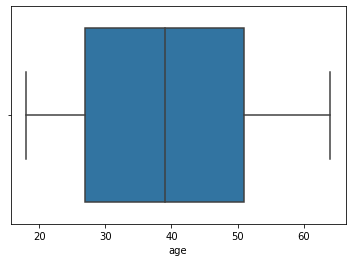

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


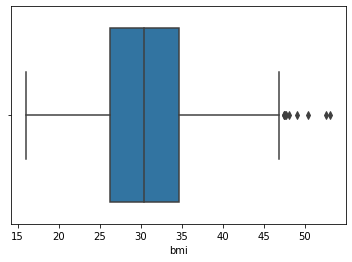

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


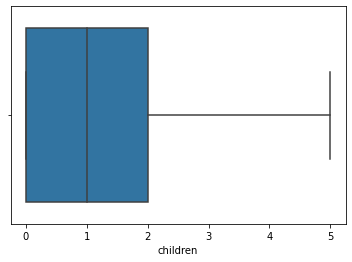

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


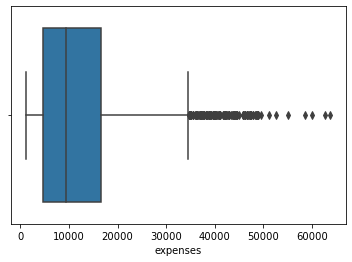

In [6]:
for i in data.columns:
    if data[i].dtype=='int64'or data[i].dtype=='float64':
        sb.boxplot(data[i])
        plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


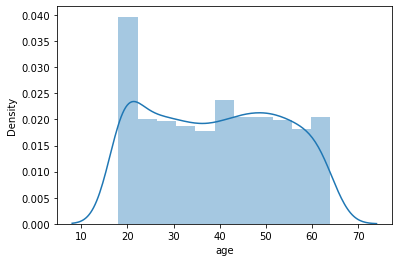

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


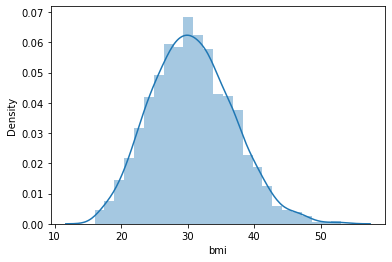

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


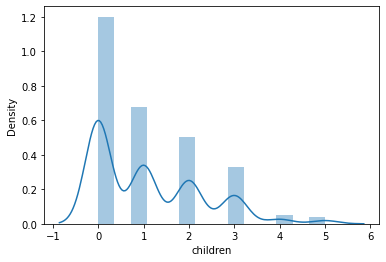

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


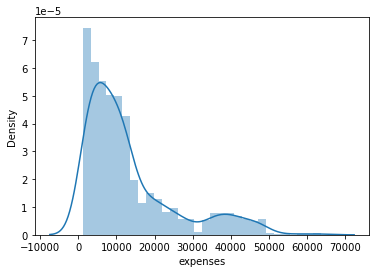

In [7]:
for i in data.columns:
    if data[i].dtype=='int64'or data[i].dtype=='float64':
        sb.distplot(data[i])
        plt.show()

In [8]:
x=data.drop('expenses',1)
y=data['expenses']

In [9]:
x

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest
1334,18,female,31.9,0,no,northeast
1335,18,female,36.9,0,no,southeast
1336,21,female,25.8,0,no,southwest


In [10]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [12]:
xtrain

,age,sex,bmi,children,smoker,region
216,53,female,26.6,0,no,northwest
731,53,male,21.4,1,no,southwest
866,18,male,37.3,0,no,southeast
202,60,female,24.0,0,no,northwest
820,45,male,33.7,1,no,southwest
...,...,...,...,...,...,...
715,60,male,28.9,0,no,southwest
905,26,female,29.4,2,no,northeast
1096,51,female,35.0,2,yes,northeast
235,40,female,22.2,2,yes,southeast


In [13]:
xtest

,age,sex,bmi,children,smoker,region
559,19,male,35.5,0,no,northwest
1087,57,male,31.5,0,no,northwest
1020,51,male,37.0,0,no,southwest
460,49,female,36.6,3,no,southeast
802,21,male,22.3,1,no,southwest
...,...,...,...,...,...,...
682,39,male,35.3,2,yes,southwest
629,44,female,39.0,0,yes,northwest
893,47,male,38.9,2,yes,southeast
807,19,female,36.6,0,no,northwest


# Linear regression

In [14]:
lr1=ColumnTransformer([
    ('onehot',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,4,5])
],remainder='passthrough')
lr2=ColumnTransformer([
    ('scalar',StandardScaler(),slice(0,11))
])
lr3=LinearRegression()


lr_pipe=Pipeline([
    ('lr1',lr1),
    ('lr2',lr2),
    ('lr3',lr3)
])

lr_pipe.fit(xtrain,ytrain)

lr_ypred=lr_pipe.predict(xtest)

print('lr_r2score',r2_score(ytest,lr_ypred))
print('lr_mse',mean_squared_error(ytest,lr_ypred))
print('lr_rmse',np.sqrt(mean_squared_error(ytest,lr_ypred)))

lr_r2score 0.7623726868541256
lr_mse 35473159.11122701
lr_rmse 5955.934780639141


In [15]:
score=cross_val_score(lr_pipe,x,y,cv=5,scoring='neg_mean_squared_error')
score=np.sqrt(abs(score))
score 
avg=np.mean(score)
std=np.std(score)
coff_var=std/avg
res_rmse_lr=avg,std,coff_var
res_rmse_lr

(6077.22994952601, 198.77129644872014, 0.03270754901486378)

# Ridge 

In [16]:
ri1=ColumnTransformer([
    ('onehot',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,4,5])
],remainder='passthrough')
ri2=ColumnTransformer([
    ('scalar',StandardScaler(),slice(0,11))
])
ri3=Ridge()


ri_pipe=Pipeline([
    ('ri1',ri1),
    ('ri2',ri2),
    ('ri3',ri3)
])

ri_pipe.fit(xtrain,ytrain)

ri_ypred=ri_pipe.predict(xtest)

print('ridge_r2score',r2_score(ytest,ri_ypred))
print('ridge_mse',mean_squared_error(ytest,ri_ypred))
print('ridge_rmse',np.sqrt(mean_squared_error(ytest,ri_ypred)))

ridge_r2score 0.7623174825064799
ridge_mse 35481400.05197469
ridge_rmse 5956.626566436299


In [17]:
param={'ri3__alpha':[0.00001,0.0001,0.001,0.01,0.1,0.2,0.5,0.8,1,2,5,10,20,30,50,100]}


grid=GridSearchCV(ri_pipe,param_grid=param,scoring='r2',cv=5)

mod_grid=grid.fit(x,y)

mod_grid.best_params_,mod_grid.best_score_

({'ri3__alpha': 10}, 0.7469113742587039)

In [18]:
ri1=ColumnTransformer([
    ('onehot',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,4,5])
],remainder='passthrough')
ri2=ColumnTransformer([
    ('scalar',StandardScaler(),slice(0,11))
])
ri3=Ridge(alpha=10)


ri_pipe=Pipeline([
    ('ri1',ri1),
    ('ri2',ri2),
    ('ri3',ri3)
])

ri_pipe.fit(xtrain,ytrain)

ri_ypred=ri_pipe.predict(xtest)

print('ridge_r2score',r2_score(ytest,ri_ypred))
print('ridge_mse',mean_squared_error(ytest,ri_ypred))
print('ridge_rmse',np.sqrt(mean_squared_error(ytest,ri_ypred)))

ridge_r2score 0.7620945223623361
ridge_mse 35514683.68660393
ridge_rmse 5959.419744119718


In [19]:
score=cross_val_score(ri_pipe,x,y,cv=5,scoring='neg_mean_squared_error')
score=np.sqrt(abs(score))
score 
avg=np.mean(score)
std=np.std(score)
coff_var=std/avg
res_rmse_ridge=avg,std,coff_var
res_rmse_ridge

(6072.231443807641, 192.97247393663847, 0.031779499138398046)

# lasso

In [19]:
la1=ColumnTransformer([
    ('onehot',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,4,5])
],remainder='passthrough')
la2=ColumnTransformer([
    ('scalar',StandardScaler(),slice(0,11))
])
la3=Lasso()


la_pipe=Pipeline([
    ('la1',la1),
    ('la2',la2),
    ('la3',la3)
])

la_pipe.fit(xtrain,ytrain)

la_ypred=la_pipe.predict(xtest)

print('lasso_r2score',r2_score(ytest,la_ypred))
print('lasso_mse',mean_squared_error(ytest,la_ypred))
print('lasso_rmse',np.sqrt(mean_squared_error(ytest,la_ypred)))

lasso_r2score 0.7623269482848388
lasso_mse 35479986.994454525
lasso_rmse 5956.507953025373


In [21]:
param={'la3__alpha':[0.00001,0.0001,0.001,0.01,0.1,0.2,0.5,0.8,1,2,5,10,20,30,50,100]}

grid=GridSearchCV(la_pipe,param_grid=param,cv=5,scoring='r2')
mod_las=grid.fit(x,y)
print('best_param',mod_las.best_params_)
print('best_score',mod_las.best_score_)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.200e+09, tolerance: 1.612e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.195e+09, tolerance: 1.564e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.200e+09, toleranc

best_param {'la3__alpha': 50}
best_score 0.747005490365243


In [20]:
la1=ColumnTransformer([
    ('onehot',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,4,5])
],remainder='passthrough')
la2=ColumnTransformer([
    ('scalar',StandardScaler(),slice(0,11))
])
la3=Lasso(alpha=50)


la_pipe=Pipeline([
    ('la1',la1),
    ('la2',la2),
    ('la3',la3)
])

la_pipe.fit(xtrain,ytrain)

la_ypred=la_pipe.predict(xtest)

print('lasso_r2score',r2_score(ytest,la_ypred))
print('lasso_mse',mean_squared_error(ytest,la_ypred))
print('lasso_rmse',np.sqrt(mean_squared_error(ytest,la_ypred)))

lasso_r2score 0.7615283146151453
lasso_mse 35599207.54558382
lasso_rmse 5966.507147870002


# Adaboost regressor

In [21]:
ad1=ColumnTransformer([
    ('onehot',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,4,5])
],remainder='passthrough')
ad2=ColumnTransformer([
    ('scalar',StandardScaler(),slice(0,11))
])
ad3=AdaBoostRegressor()


ad_pipe=Pipeline([
    ('ad1',ad1),
    ('ad2',ad2),
    ('ad3',ad3)
])

ad_pipe.fit(xtrain,ytrain)

ad_ypred=ad_pipe.predict(xtest)

print('ada_regressor_r2score',r2_score(ytest,ad_ypred))
print('ada_regressor_mse',mean_squared_error(ytest,ad_ypred))
print('ada_regressor_rmse',np.sqrt(mean_squared_error(ytest,ad_ypred)))

ada_regressor_r2score 0.8082014233927195
ada_regressor_mse 28631815.65799331
ada_regressor_rmse 5350.87055141435


In [24]:
param={'ad3__n_estimators':[500,1000,2000],'ad3__learning_rate':[0.001,0.01,.1],'ad3__random_state':[1,5,10,15,20]}
search=GridSearchCV(ad_pipe,param_grid=param,cv=5,scoring='r2')
mod_ada=search.fit(x,y)
print('best_param',mod_ada.best_params_)
print('best_score',mod_ada.best_score_)

best_param {'ad3__learning_rate': 0.001, 'ad3__n_estimators': 500, 'ad3__random_state': 10}
best_score 0.8494648148395555


In [22]:
ad1=ColumnTransformer([
    ('onehot',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,4,5])
],remainder='passthrough')
ad2=ColumnTransformer([
    ('scalar',StandardScaler(),slice(0,11))
])
ad3=AdaBoostRegressor(learning_rate=0.001,n_estimators=500,random_state=10)


ad_pipe=Pipeline([
    ('ad1',ad1),
    ('ad2',ad2),
    ('ad3',ad3)
])

ad_pipe.fit(xtrain,ytrain)

ad_ypred=ad_pipe.predict(xtest)

print('ada_regressor_r2score',r2_score(ytest,ad_ypred))
print('ada_regressor_mse',mean_squared_error(ytest,ad_ypred))
print('ada_regressor_rmse',np.sqrt(mean_squared_error(ytest,ad_ypred)))

ada_regressor_r2score 0.8677795302360451
ada_regressor_mse 19737957.306358505
ada_regressor_rmse 4442.742093162567


# gradientboost regressor

In [23]:
gb1=ColumnTransformer([
    ('onehot',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,4,5])
],remainder='passthrough')
gb2=ColumnTransformer([
    ('scalar',StandardScaler(),slice(0,11))
])
gb3=GradientBoostingRegressor(learning_rate=0.01,max_depth=2,n_estimators=1000,random_state=10,subsample=0.75)


gb_pipe=Pipeline([
    ('gb1',gb1),
    ('gb2',gb2),
    ('gb3',gb3)
])

gb_pipe.fit(xtrain,ytrain)

gb_ypred=gb_pipe.predict(xtest)

print('ada_regressor_r2score',r2_score(ytest,gb_ypred))
print('ada_regressor_mse',mean_squared_error(ytest,gb_ypred))
print('ada_regressor_rmse',np.sqrt(mean_squared_error(ytest,gb_ypred)))

ada_regressor_r2score 0.8798967514378659
ada_regressor_mse 17929090.682452124
ada_regressor_rmse 4234.275697501536


In [27]:
gb_param={'gb3__n_estimators':[100,250,500,1000,2000],'gb3__learning_rate':[0.001,0.01,0.1,0.2,0.3,0.7,0.8],
          'gb3__max_depth':[1,2,4],'gb3__subsample':[0.5,0.75,1],'gb3__random_state':[1,5,10,20,45,25]}
search=GridSearchCV(gb_pipe,param_grid=gb_param,cv=5,scoring='r2')
mod_gb=search.fit(x,y)
print('best_param',mod_gb.best_params_)
print('best_score',mod_gb.best_score_)

best_param {'gb3__learning_rate': 0.01, 'gb3__max_depth': 2, 'gb3__n_estimators': 1000, 'gb3__random_state': 10, 'gb3__subsample': 0.75}
best_score 0.8605964873662287


# Random Forest

In [24]:
ra1=ColumnTransformer([
    ('onehot',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,4,5])
],remainder='passthrough')

ra2=ColumnTransformer([
    ('scaling',StandardScaler(),slice(0,11))
])

ra3=RandomForestRegressor()

ra_pipe=Pipeline([
    ('ra1',ra1),
    ('ra2',ra2),
    ('ra3',ra3)
])


ra_pipe.fit(xtrain,ytrain)

ra_ypred=ra_pipe.predict(xtest)

print('ada_regressor_r2score',r2_score(ytest,ra_ypred))
print('ada_regressor_mse',mean_squared_error(ytest,ra_ypred))
print('ada_regressor_rmse',np.sqrt(mean_squared_error(ytest,ra_ypred)))

ada_regressor_r2score 0.8522538491497651
ada_regressor_mse 22055641.027950257
ada_regressor_rmse 4696.3433677649955


In [30]:
ra_param={'ra3__n_estimators':[3,5,7,9,11],'ra3__criterion':['squared_error','absolute_error','poisson'],
       'ra3__max_depth':[2,3,4,5,6,7,8,9],'ra3__max_features':['sqrt','log2'],'ra3__min_samples_leaf':[1,2,3,4,5,6]}

search=GridSearchCV(ra_pipe,param_grid=ra_param,cv=5,scoring='r2')
mod_ra=search.fit(x,y)
print('best_param',mod_ra.best_params_)
print('best_score',mod_ra.best_score_)

best_param {'ra3__criterion': 'squared_error', 'ra3__max_depth': 9, 'ra3__max_features': 'sqrt', 'ra3__min_samples_leaf': 3, 'ra3__n_estimators': 11}
best_score 0.8443775741161768


# polynomial features

In [25]:
py1=ColumnTransformer([
    ('one_hot',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'),[1,4,5])
],remainder='passthrough')

py2=ColumnTransformer([
    ('scaling',StandardScaler(),slice(0,11))
])
py3=PolynomialFeatures(degree=2,interaction_only=True)

py4=Ridge(alpha=10)

ply_pipe=Pipeline([
    ('py1',py1),
    ('py2',py2),
    ('py3',py3),
    ('py4',py4)
   ])

# training the model
ply_pipe.fit(xtrain,ytrain)


ypred=ply_pipe.predict(xtest)


print('poly_ridge r2score',r2_score(ytest,ypred))

print('poly_ridge MSE',mean_squared_error(ytest,ypred))

print('poly_ridge RMSE',np.sqrt(mean_squared_error(ytest,ypred)))

poly_ridge r2score 0.858631857661323
poly_ridge MSE 21103527.7891646
poly_ridge RMSE 4593.85761524719


In [26]:
py1=ColumnTransformer([
    ('one_hot',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'),[1,4,5])
],remainder='passthrough')

py2=ColumnTransformer([
    ('scaling',StandardScaler(),slice(0,11))
])
py3=PolynomialFeatures(degree=2,interaction_only=True)

py4=Lasso(alpha=50)

ply_pipe=Pipeline([
    ('py1',py1),
    ('py2',py2),
    ('py3',py3),
    ('py4',py4)
   ])

# training the model
ply_pipe.fit(xtrain,ytrain)


ypred=ply_pipe.predict(xtest)


print('poly_ridge r2score',r2_score(ytest,ypred))

print('poly_ridge MSE',mean_squared_error(ytest,ypred))

print('poly_ridge RMSE',np.sqrt(mean_squared_error(ytest,ypred)))

poly_ridge r2score 0.858398319445647
poly_ridge MSE 21138390.525158834
poly_ridge RMSE 4597.650544045168


In [37]:
import pickle
pickle.dump(gb_pipe,open('model.pkl','wb'))

In [38]:
pipe=pickle.load(open('model.pkl','rb'))

In [39]:
inp=x.iloc[35,:].values.reshape(1,-1)
inp

array([[19, 'male', 20.4, 0, 'no', 'northwest']], dtype=object)

In [40]:
pipe.predict(inp)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([2034.26079673])

In [36]:
data.iloc[1,:].values.reshape(1,-1)

array([[18, 'male', 33.8, 1, 'no', 'southeast', 1725.55]], dtype=object)